# The Normal Equation 

Para encontrar el valor de **θ** que minimiza la función de costo, existe una solución de forma cerrada, en otras palabras, una ecuación matemática que da el resultado directamente. A esto se le llama Ecuación Normal: 

Ecuación normal: $\theta = (X^{T}X)^{-1}X^{T}Y$

* $\theta$ es el valor de θ que minimiza la función de costo.

* Y es el vector de valores objetivo que contiene $Y^{(1)}$ hacia $Y^{(m)}$

Primero, importemos algunos módulos comunes, asegurémonos de que MatplotLib traza las figuras en línea y preparemos una función para guardar las figuras. También verificamos que Python 3.5 o posterior esté instalado (aunque Python 2.x puede funcionar, está obsoleto, por lo que le recomendamos encarecidamente que use Python 3 en su lugar), así como Scikit-Learn ≥0.20.

In [10]:
# Verificamos que Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

# Verificamos que Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Importamos bibliotecas comunes
import numpy as np
import os

# Para que salgan resultados semejantes
np.random.seed(42)

# Para pintar bonitas figuras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Lugar donde se guardaran las figuras
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Para ignorar adventencias que no son necesarias
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Vamos a generar algunos datos de apariencia lineal para probar esta ecuación: 

In [11]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Mostremos el conjunto de datos lineales generados aleatoriamente

Saving figure generated_data_plot


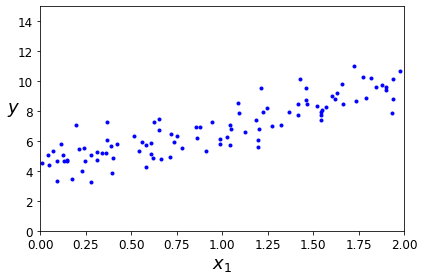

In [12]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Ahora calculemos $\theta$ usando la ecuación normal. Usaremos la función inv() del módulo de Álgebra lineal de NumPy (np.linalg) para calcular la inversa de una matriz, y el método dot() para la multiplicación de matrices: 

In [13]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 

La función real que usamos para generar los datos es y = 4 + 3x1 + ruido gaussiano. Veamos qué encontró la ecuación:

In [16]:
theta_best

array([[4.21509616],
       [2.77011339]])

Habríamos esperado $\theta_{0}$ = 4 y $\theta_{1}$ = 3 en lugar de $\theta_{0}$ = 4.215 y $\theta_{1}$ = 2.770. Lo suficientemente cerca, pero el ruido hizo imposible recuperar los parámetros exactos de la función original. 

Ahora harémos predicciones usando θ:

In [18]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Tracemos las predicciones de este modelo

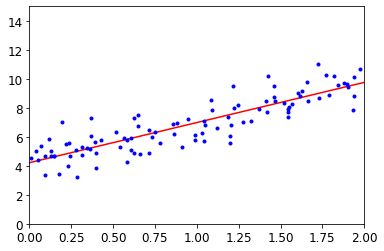

In [19]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Realizar una regresión lineal usando Scikit-Learn es bastante simple:

Saving figure linear_model_predictions_plot


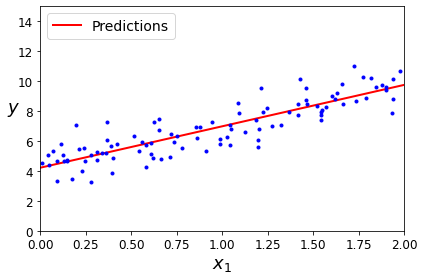

In [22]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [25]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

La clase LinearRegression se basa en la función scipy.linalg.lstsq () (el nombre significa "mínimos cuadrados"), a la que puede llamar directamente:

In [27]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

Esta función calcula $\theta$ = $X^+$ + y, donde $X^+$ + es el pseudoinverso de X (específicamente el inverso de Moore-Penrose). Puede usar np.linalg.pinv () para calcular la pseudoinversa directamente:

In [29]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

El pseudoinverso en sí mismo se calcula usando una técnica de factorización de matrices estándar llamada Descomposición de valores singulares (SVD) que puede descomponer la matriz **X** del conjunto de entrenamiento en la multiplicación de tres matrices **U Σ** $V^T$ (ver numpy.linalg.svd ()). La pseudoinversa se calcula como $X^+$ = $VΣ^+U^T$. Para calcular la matriz $Σ^+$, el algoritmo toma Σ y pone a cero todos los valores menores que un pequeño valor de umbral, luego reemplaza todos los valores distintos de cero con su inverso, y finalmente transpone la matriz resultante. Este enfoque es más eficiente que calcular la ecuación normal, y además maneja bien los casos extremos: de hecho, la ecuación normal puede no funcionar si la matriz $X^T$X no es invertible (es decir, singular), como si m < n o si algunas características son redundante, pero el pseudoinverso siempre está definido.

# Complejidad computacional

La ecuación normal calcula la inversa de $X^T X$, que es una matriz (n + 1) × (n + 1) (donde n es el número de características). La complejidad computacional de invertir tal matriz es típicamente de aproximadamente O ($n^2.4$) a O ($n^3$) (dependiendo de la implementación). En otras palabras, si duplica el número de características, multiplica el tiempo de cálculo por aproximadamente $2^2,4$ = 5,3 a $2^3$ = 8. 

El enfoque SVD utilizado por la clase LinearRegression de Scikit-Learn es aproximadamente O ($n^2$). Si duplica la cantidad de funciones, multiplica el tiempo de cálculo por aproximadamente 4.

>Tanto la ecuación normal como el enfoque SVD se vuelven muy lentos cuando la cantidad de características aumenta (por ejemplo, 100.000). En el lado positivo, ambos son lineales con respecto al número de instancias en el conjunto de entrenamiento (son O (m)), por lo que manejan grandes conjuntos de entrenamiento de manera eficiente, siempre que puedan caber en la memoria.

Además, una vez que haya entrenado su modelo de regresión lineal (usando la ecuación normal o cualquier otro algoritmo), las predicciones son muy rápidas: la complejidad computacional es lineal con respecto a la cantidad de instancias en las que desea hacer predicciones y la cantidad de características. En otras palabras, hacer predicciones en el doble de instancias (o el doble de funciones) llevará aproximadamente el doble de tiempo. Ahora veremos formas muy diferentes de entrenar un modelo de regresión lineal, más adecuado para casos donde hay una gran cantidad de características o demasiadas instancias de entrenamiento para caber en la memoria.

# Gradient Descent

Gradient Descent es un algoritmo de optimización muy genérico capaz de encontrar soluciones óptimas a una amplia gama de problemas. La idea general de Gradient Descent es ajustar los parámetros de forma iterativa para minimizar una función de coste.

Suponga que está perdido en las montañas en una densa niebla; solo puedes sentir la pendiente del suelo debajo de tus pies. Una buena estrategia para llegar rápidamente al fondo del valle es descender en dirección a la pendiente más pronunciada. Esto es exactamente lo que hace Gradient Descent: mide el gradiente local de la función de error con respecto al vector de parámetros θ, y va en la dirección del gradiente descendente. Una vez que el gradiente es cero, ¡ha alcanzado un mínimo!

Concretamente, comienza llenando θ con valores aleatorios (esto se llama inicialización aleatoria), y luego lo mejora gradualmente, dando un pequeño paso a la vez, cada paso intentando disminuir la función de costo (por ejemplo, el MSE), hasta que el algoritmo converja al mínimo: